In [79]:
import numpy as np
from matplotlib import pyplot as plt

In [80]:
from PIL import Image, ImageDraw
def rounded_rectangle(self: ImageDraw, xy, corner_radius, fill=None, outline=None, width=1):
    upper_left_point = xy[0]
    bottom_right_point = xy[1]
    self.rectangle(
        [
            (upper_left_point[0], upper_left_point[1] + corner_radius),
            (upper_left_point[0]+corner_radius, bottom_right_point[1]-corner_radius)
        ],
        fill=outline, outline=outline, width=width
    )
    self.rectangle(
        [
            (upper_left_point[0]+corner_radius, upper_left_point[1]),
            (bottom_right_point[0]-corner_radius, corner_radius)
        ],
        fill=outline, outline=outline, width=width
    )
    self.rectangle(
        [
            (bottom_right_point[0]-corner_radius, corner_radius),
            (bottom_right_point[0], bottom_right_point[1]-corner_radius)
        ],
        fill=outline, outline=outline, width=width
    )
    self.rectangle(
        [
            (corner_radius, bottom_right_point[1]-corner_radius),
            (bottom_right_point[0]-corner_radius, bottom_right_point[1])
        ],
        fill=outline, outline=outline, width=width
    )
    self.pieslice([upper_left_point, (upper_left_point[0] + corner_radius * 2, upper_left_point[1] + corner_radius * 2)],
        180, 270, fill=fill, outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, bottom_right_point[1] - corner_radius * 2), bottom_right_point],
        0, 90, fill=fill, outline=outline
    )
    self.pieslice([(upper_left_point[0], bottom_right_point[1] - corner_radius * 2), (upper_left_point[0] + corner_radius * 2, bottom_right_point[1])],
        90, 180, fill=fill, outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, upper_left_point[1]), (bottom_right_point[0], upper_left_point[1] + corner_radius * 2)],
        270, 360, fill=fill, outline=outline
    )

ImageDraw.rounded_rectangle = rounded_rectangle

(1242, 1739)


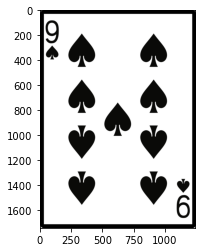

In [81]:
im = Image.open('hd/9S@3x.png')
width, height = im.size
draw = ImageDraw.Draw(im, "RGBA")
ImageDraw.rounded_rectangle(draw, xy = [(0, 0), (width, height)], corner_radius = 30, 
                            fill=(0, 0, 0), outline=(0, 0, 0))
print(im.size)
plt.imshow(np.asarray(im))

<ipython-input-136-b28f8085af08>:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


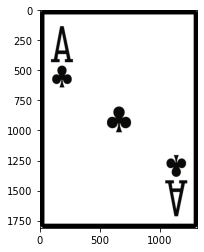

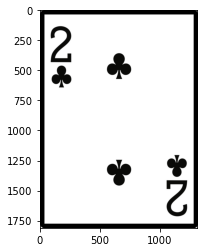

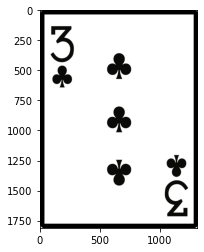

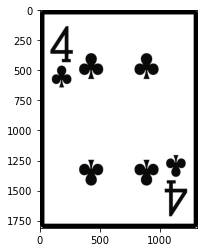

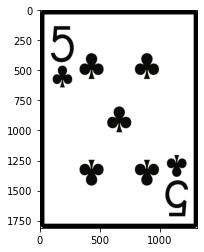

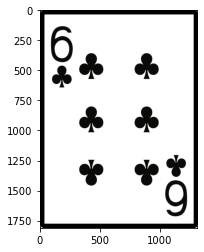

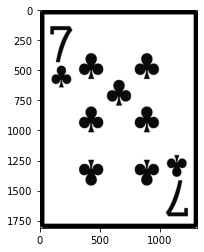

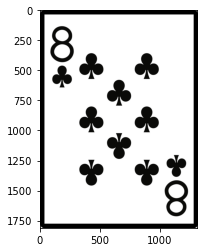

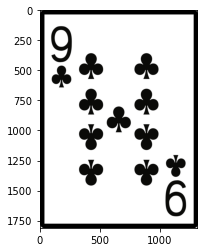

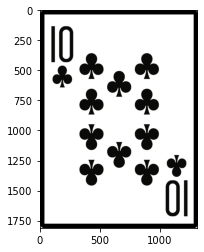

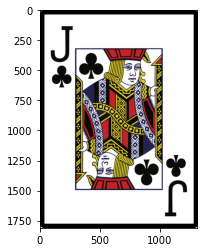

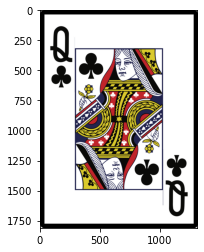

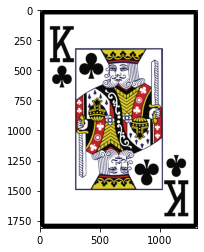

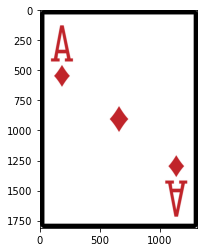

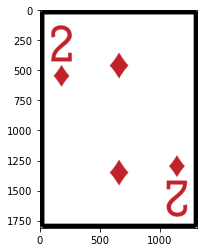

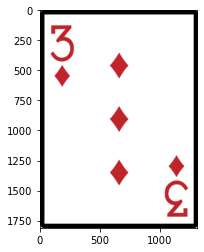

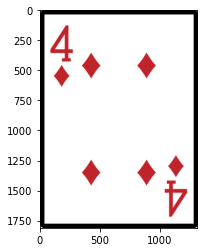

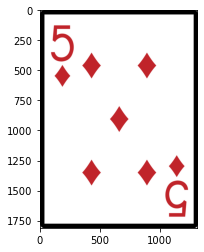

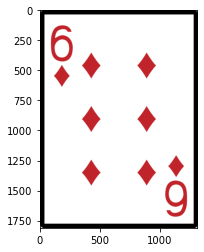

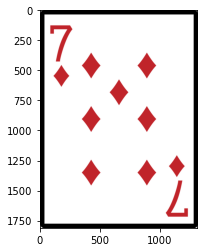

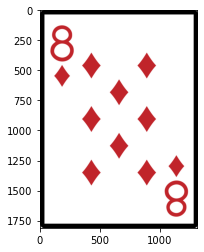

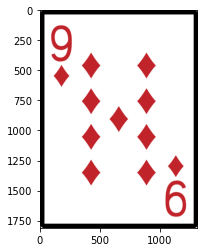

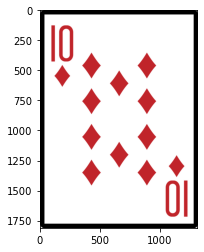

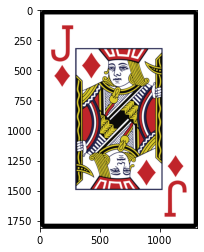

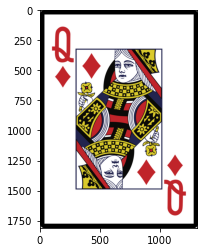

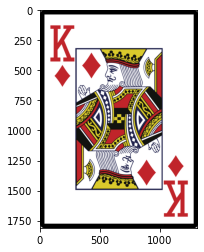

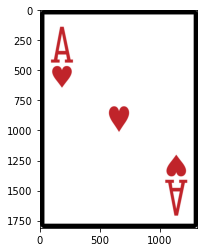

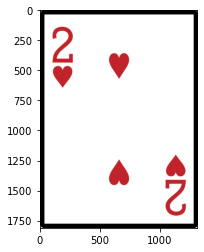

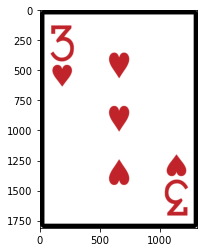

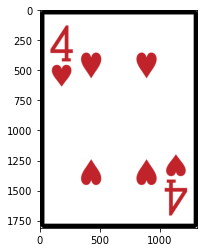

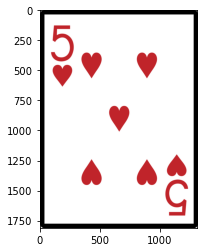

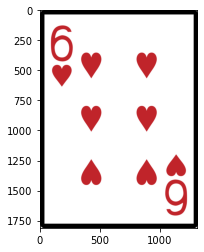

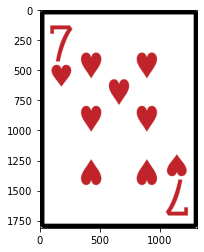

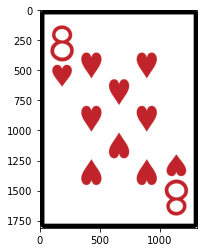

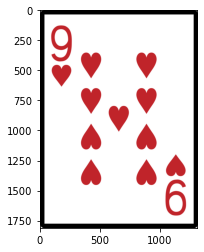

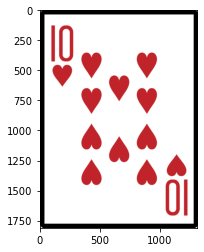

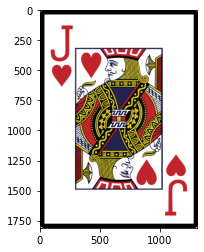

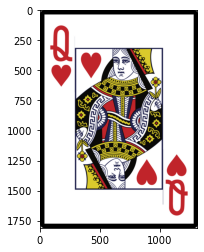

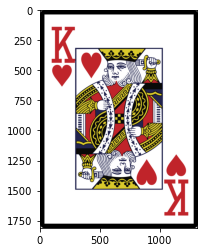

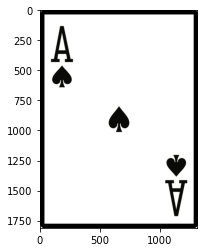

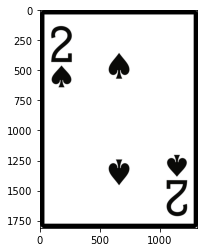

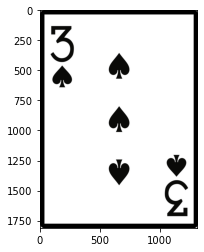

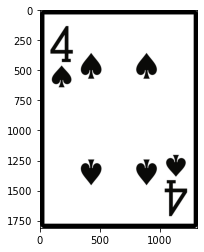

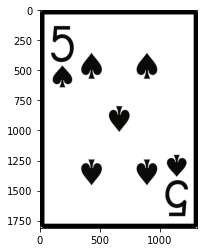

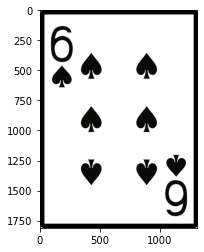

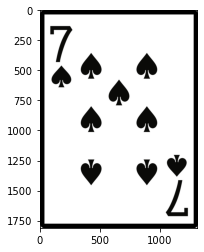

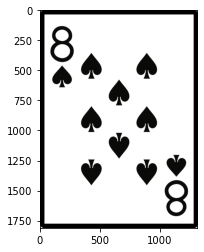

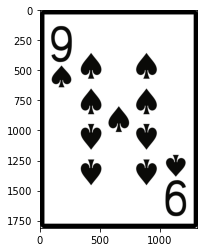

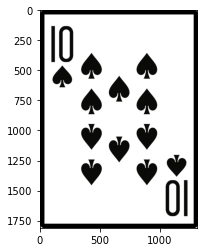

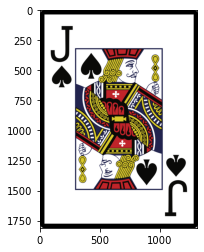

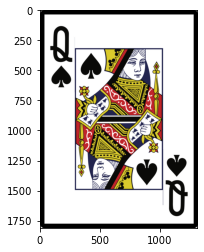

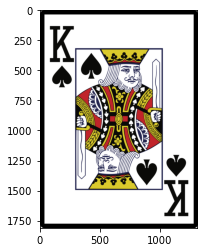

In [136]:
# Original image
numbers = ['A'] + [str(num) for num in range(2, 10)] + ['T', 'J', 'Q', 'K']
colors = ['C', 'D', 'H', 'S']
input_cards = ['hd/{}{}@3x'.format(number, color) for color in colors for number in numbers]
for input_card in input_cards:
    im = Image.open(input_card + '.png')  # e.g., 'hd/9S@3x.png'
    width, height = im.size  # (1242, 1739)

    # New output image
    corner_radius = 36
    inner_im = Image.new(color = "white", mode = "RGBA", size = (width, height))
    bg_im = Image.new(mode = "RGBA", size = (width + 2*corner_radius, height + 2*corner_radius))
    width, height = bg_im.size

    # Paste original image
    bg_im.paste(inner_im, (corner_radius, corner_radius))

    # Upper left symbol - a 140-width, 360-height box, resize to (229, 588)
    component = im.crop((25, 60, 165, 420))
    component = component.resize((229, 588), Image.ANTIALIAS)
    bg_im.paste(component, (25+corner_radius, 60+corner_radius))
    
    # Middle symbox - a 912-width, 1479-height box, resize to (734, 1190)
    component = im.crop((165, 130, 1077, 1609))
    component = component.resize((734, 1190), Image.ANTIALIAS)
    bg_im.paste(component, (25+229+corner_radius, 274+corner_radius))
    
    # lower right symbol - a 140-width, 360-height box
    component = im.crop((1075, 1319, 1215, 1679))  # (-27, -60)
    component = component.resize((229, 588), Image.ANTIALIAS)
    bg_im.paste(component, (width-corner_radius-27-229, 
                            height-corner_radius-60-558))

    # Draw outline
    draw = ImageDraw.Draw(bg_im, "RGBA")
    ImageDraw.rounded_rectangle(draw, xy = [(0, 0), (width, height)], 
                                corner_radius = corner_radius, 
                                fill=(0, 0, 0), outline=(0, 0, 0))
    plt.figure()
    plt.imshow(np.asarray(bg_im))
    bg_im.save("past/tmp.png")

In [139]:
# Original image
numbers = ['A'] + [str(num) for num in range(2, 10)] + ['T', 'J', 'Q', 'K']
colors = ['C', 'D', 'H', 'S']
input_cards = ['hd/{}{}@3x'.format(number, color) for color in colors for number in numbers]
numbers = [str(num) for num in range(1, 11)] + ['j', 'q', 'k']
colors = ['c', 'd', 'h', 's']
output_cards = ['{}{}'.format(color, number) for color in colors for number in numbers]
suffixes = ["", "_106w_28d", "_large"]
whs = [(71, 96), (106, 143), (142, 192)]
for input_card, output_card in zip(input_cards, output_cards):
    im = Image.open(input_card + '.png')  # e.g., 'hd/9S@3x.png'
    width, height = im.size  # (1242, 1739)

    # New output image
    corner_radius = 18
    bg_im = Image.new(mode = "RGBA", size = (width + 2*corner_radius, height + 2*corner_radius))
    width, height = bg_im.size

    # Paste original image
    bg_im.paste(inner_im, (corner_radius, corner_radius))

    # Upper left symbol - a 140-width, 360-height box, resize to (229, 588)
    component = im.crop((25, 60, 165, 420))
    component = component.resize((229, 588), Image.ANTIALIAS)
    bg_im.paste(component, (25+corner_radius, 60+corner_radius))
    
    # Middle symbox - a 912-width, 1479-height box, resize to (734, 1190)
    component = im.crop((165, 130, 1077, 1609))
    component = component.resize((734, 1190), Image.ANTIALIAS)
    bg_im.paste(component, (25+229+corner_radius, 274+corner_radius))
    
    # lower right symbol - a 140-width, 360-height box
    component = im.crop((1075, 1319, 1215, 1679))  # (-27, -60)
    component = component.resize((229, 588), Image.ANTIALIAS)
    bg_im.paste(component, (width-corner_radius-27-229, 
                            height-corner_radius-60-558))

    # Draw outline
    draw = ImageDraw.Draw(bg_im, "RGBA")
    ImageDraw.rounded_rectangle(draw, xy = [(0, 0), (width, height)], 
                                corner_radius = corner_radius, 
                                fill=(0, 0, 0), outline=(0, 0, 0))

    for (width, height), suffix in zip(whs, suffixes):
        bg_im2 = bg_im.resize((width, height), Image.ANTIALIAS)
        bg_im2.save(output_card + suffix + '.png')